In [11]:
import pandas as pd

In [12]:
df= pd.read_csv('train.csv')

###  How big is the data

In [13]:
df.shape

(891, 12)

### How does the data looks

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C


### what is the data type of cols 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Are there any missing values?

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### how does data looks numerically? 

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### are there duplicate values?

In [19]:
df.duplicated().sum()

0

### how is the corellation between cols

In [20]:
df.corr()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [21]:
numeric_df = df.select_dtypes(include=[float, int])
numeric_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [22]:
numeric_df = df.select_dtypes(include=[float, int])
numeric_df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#sns.countplot(df['Survived'])
df['Survived'].value_counts().plot(kind='pie')

NameError: name 'df' is not defined

<Axes: ylabel='count'>

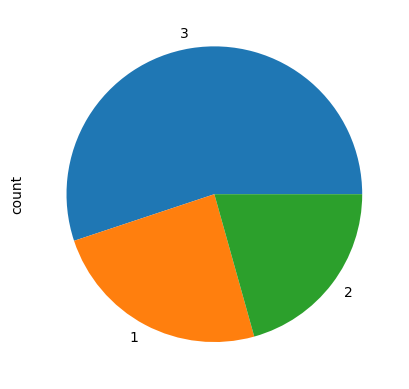

In [25]:
df['Pclass'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

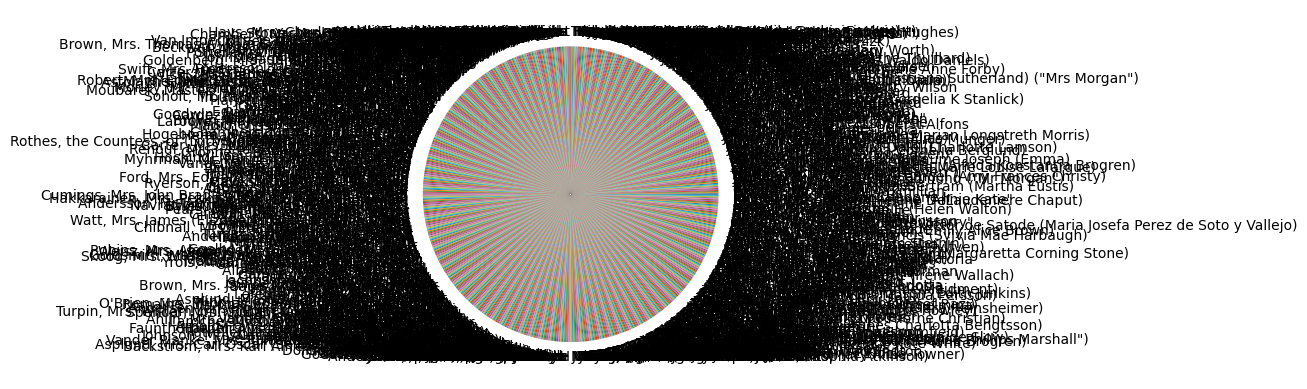

In [26]:
df['Name'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

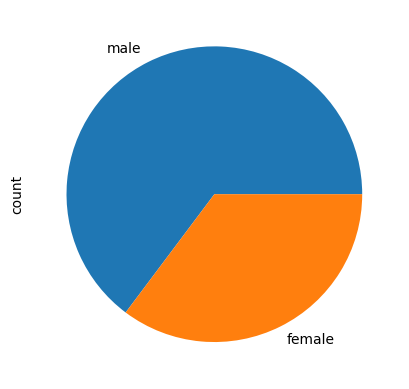

In [27]:
df['Sex'].value_counts().plot(kind='pie')

In [31]:
pip install --upgrade seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


<Axes: ylabel='count'>

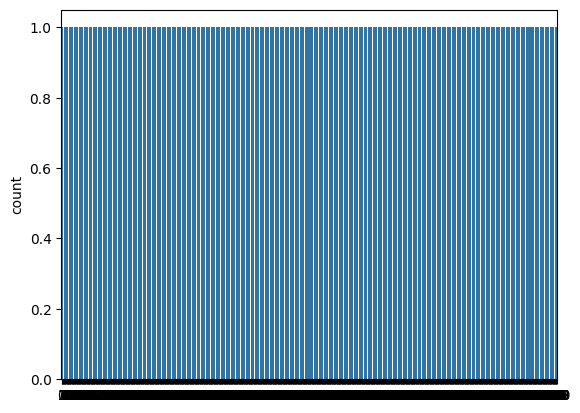

In [28]:
sns.countplot(df['Pclass']) 

<Axes: xlabel='count', ylabel='Sex'>

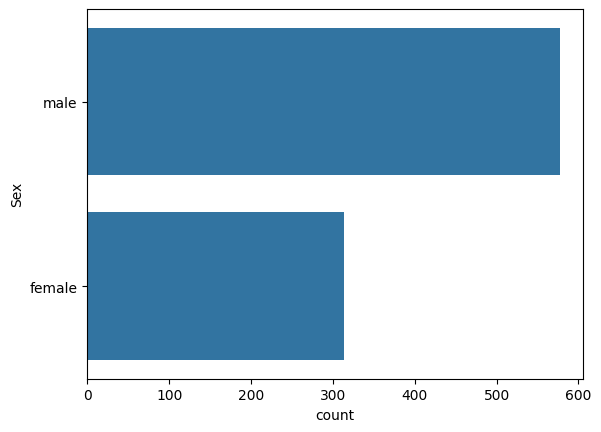

In [29]:
sns.countplot(df['Sex'])

<Axes: xlabel='count', ylabel='Embarked'>

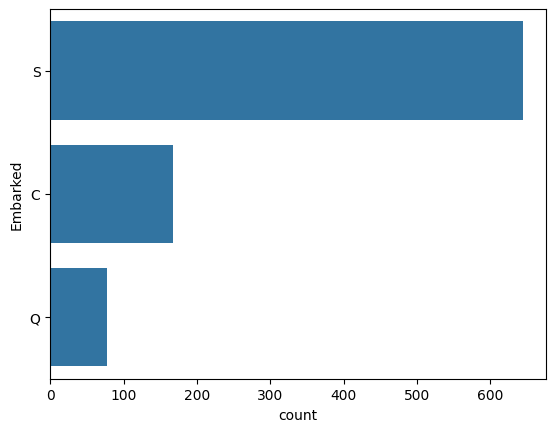

In [30]:
sns.countplot(df['Embarked'])

<Axes: ylabel='count'>

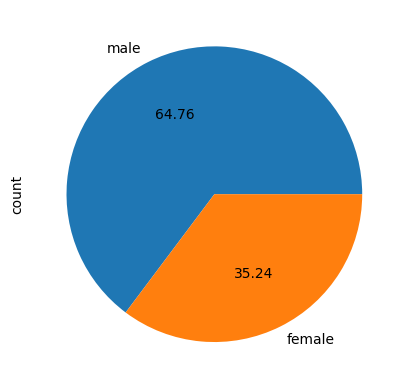

In [31]:
df['Sex'].value_counts().plot(kind='pie', autopct='%.2f')

##  2.numerical data

### a.Histogram

(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 22., 13., 51., 40.,
        27., 46., 24., 36., 47., 27., 35., 17., 34., 29., 11., 27.,  8.,
        18.,  9., 17., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <BarContainer object of 50 artists>)

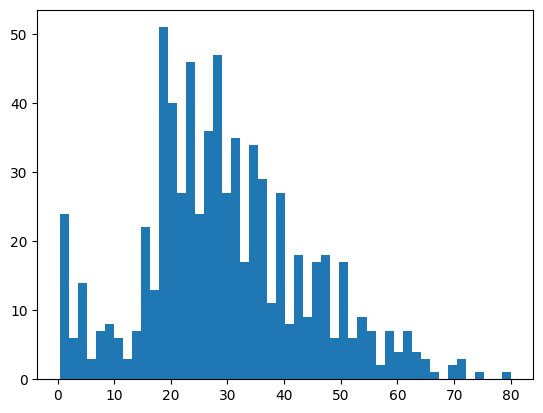

In [37]:
plt.hist(df['Age'], bins=50)

C:\Users\USER\AppData\Local\Temp\ipykernel_13076\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

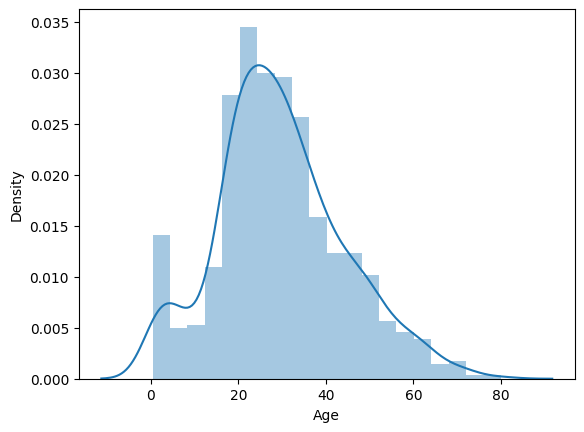

In [50]:
sns.distplot(df['Age'])

### boxplot

In [42]:
% matplotlib inline

UsageError: Line magic function `%` not found.


<Axes: xlabel='Age'>

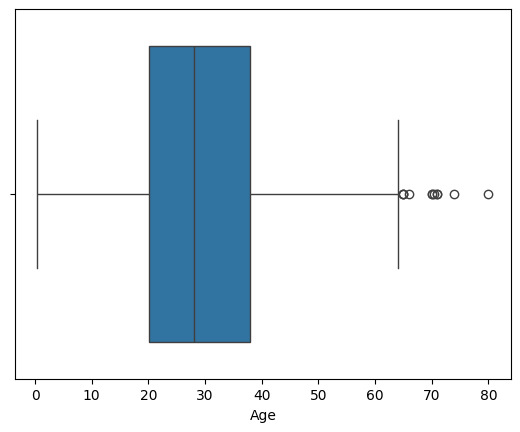

In [44]:
sns.boxplot(x=df['Age'])

In [45]:
df['Age'].min()

0.42

In [46]:
df['Age'].max()

80.0

In [47]:
df['Age'].mean()

29.69911764705882

In [48]:
df['Age'].skew()

0.38910778230082704